## Geographic Data

we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html).

We can explore a range of interesting questions and ideas using these datasets:

* For each airport, which destination airport is the most common?
* Which cities are the most important hubs for airports and airlines?

In [2]:
import pandas as pd

In [3]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

In [7]:
airlines.info()
airports.info()
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6048 non-null   int64 
 1   name      6048 non-null   object
 2   alias     5614 non-null   object
 3   iata      1461 non-null   object
 4   icao      5961 non-null   object
 5   callsign  5305 non-null   object
 6   country   6033 non-null   object
 7   active    6048 non-null   object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8107 non-null   int64  
 1   name       8107 non-null   object 
 2   city       8107 non-null   object 
 3   country    8107 non-null   object 
 4   code       5880 non-null   object 
 5   icao       8043 non-null   object 
 6   latitude   8107 non-null   flo

In [12]:
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


## Geographic Coordinate Systems

![Jupyter](./latitude_longitude.png)

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.

## Workflow With Basemap

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc',llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

## Converting From Spherical to Cartesian Coordinates

In [15]:
longitudes = airports['longitude'].tolist()

latitudes = airports['latitude'].tolist()

x, y = m(longitudes, latitudes)

## Generating A Scatter Plot

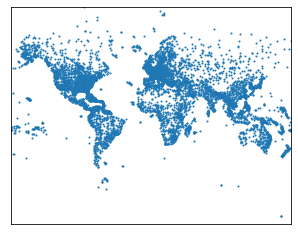

In [16]:
m.scatter(x,y,s=1)
plt.show()

## Customizing The Plot Using Basemap

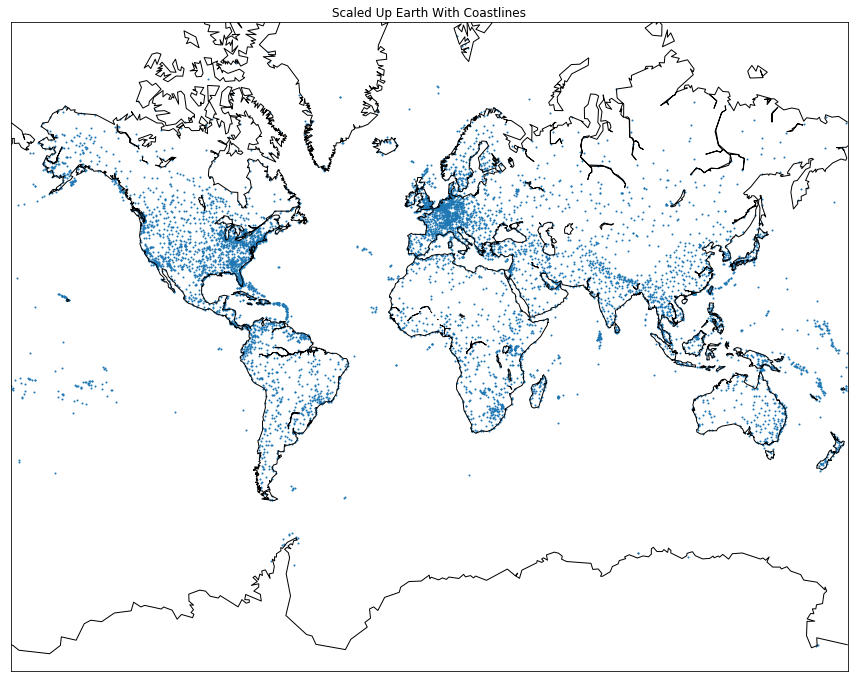

In [17]:
plt.figure(figsize=(15,20))
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.title("Scaled Up Earth With Coastlines")
plt.show()

## Introduction to Great Circles

In [13]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()

geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    67428 non-null  object 
 1   source     67428 non-null  object 
 2   dest       67428 non-null  object 
 3   equipment  67410 non-null  object 
 4   start_lon  67428 non-null  float64
 5   end_lon    67428 non-null  float64
 6   start_lat  67428 non-null  float64
 7   end_lat    67428 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


## Displaying Great Circles

In [52]:
def create_great_circles(df):
    fig, ax = plt.subplots(figsize=(15,20))
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines()
    for row in df.iterrows():
        row = row[1]
        start_lat = row['start_lat']
        end_lat = row['end_lat']
        start_lon = row['start_lon']
        end_lon = row['end_lon']
        if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon):
            m.drawgreatcircle(lat1=start_lat, lat2=end_lat, lon1=start_lon, lon2=end_lon)
    plt.show()

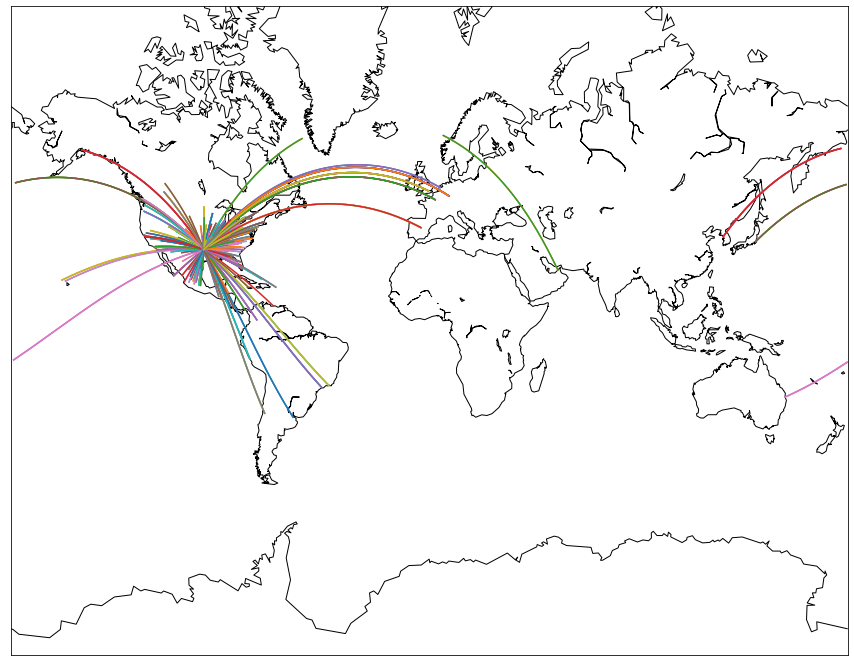

In [53]:
dfw = geo_routes[geo_routes['source'] == 'DFW']

create_great_circles(dfw)

## Conclusion

Here are some suggestions for what to do next:

* Plotting tools:
    - [Creating 3D plots using Plotly](https://plot.ly/python/3d-scatter-plots/)
    - [Creating interactive visualizations using bokeh](http://bokeh.pydata.org/en/latest/)
    - [Creating interactive map visualizations using folium](http://python-visualization.github.io/folium/)
* The art and science of data visualization:
    - [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
    - [Visual Explanations: Images and Quantities, Evidence and Narrative](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)